# Pancakes and Waffles with Support Vector Machines

Over the holidays, my family and I had a discussion about whether pancakes or waffles are better. After several minutes of heated debate, my sister tried to settle the discussion by saying that pancakes and waffles are basically the same thing, and the only thing that's different is the method of cooking. My dad firmly disagreed. Was my sister right, or can a machine learning algorithm classify pancakes and waffles based on their batter recipes? Let's find out! 

### Step 0: Data 


#### Step 0.1: Gather the data 
I went to Google to gather up some basic recipes for pancakes and waffles (resources at the end of this document). It turns out that pancakes and waffles generally have the same ingredients: 

* flour
* butter
* milk
* sugar
* eggs
* vanilla extract
* baking powder
* salt

#### Step 0.2: Clean the data

* A few recipies called for oil instead of butter. Since they serve the same purupose, I recorded any call for oil in a recipe as a butter in my entries. 
* The units varied by recipe. For example, sometimes butter measurements were given in tablespoons sometimes in cups. I converted every entry of every ingredient to cups. **NOTE**: I made an assumption that 1 egg is 1/4 cup. 
* All of the recipes yield a different amount of batter. To standardize the entries, I divided each entry by the total volume (in cups). Which resulted of the percent volume of each ingredient. 

### Step 1: Import Python libraries

In [239]:
# Analysis
import pandas as pd
import numpy as np
from sklearn import svm 
from sklearn.model_selection import cross_val_score

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=2)

### Step 2: Import the data

In [221]:
# Read in the pancake and waffle data
pancakes_waffles = pd.read_csv('https://raw.githubusercontent.com/bejajohn/pancake_waffle_svm/master/pancake_and_waffle_data.csv')
pancakes_waffles.head()

,item,flour,baking powder,sugar,salt,milk,butter,egg,vanilla
0,Pancake,45.133674,2.162809,1.853836,0.154486,37.611395,5.561522,7.522279,0.000000
1,Pancake,38.322979,1.574093,4.722272,0.393523,38.322979,4.722272,11.941881,0.000000
2,Pancake,43.163991,1.772935,5.395499,0.221617,37.768492,5.395499,5.395499,0.886468
3,Pancake,44.632464,0.916626,1.374937,0.114578,39.053406,2.749873,11.158116,0.000000
4,Pancake,41.706722,1.927258,3.910103,0.321210,39.101030,5.213471,7.820206,0.000000


### Step 3: Visualize the data

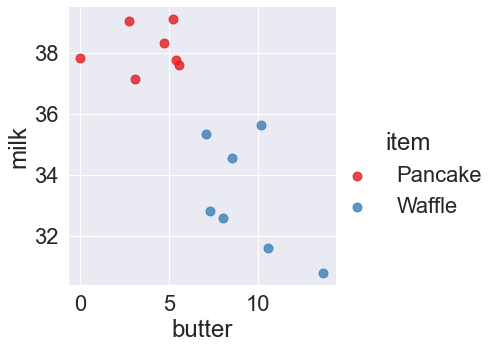

In [222]:
# Seaborn plot
sns.lmplot(x='butter',y='milk', data = pancakes_waffles, hue='item',
               palette='Set1',fit_reg=False,scatter_kws={"s":80});

### Step 4: Fit the SVM model
We will be using support vector machines for this application. You can read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [223]:
# Specify input and output for the model
X = pancakes_waffles[['butter','milk']].to_numpy()
y = np.where(pancakes_waffles['item']=='Waffle', -1, 1)

# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

### Step 5: Visualize the results

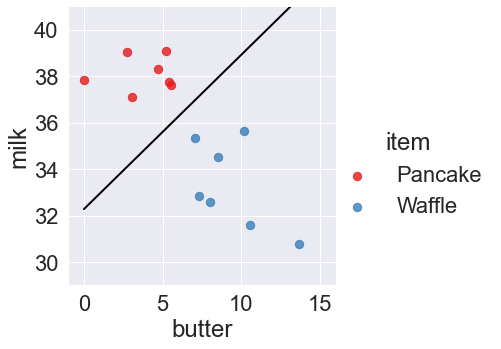

In [224]:
# Get the separating hyperplane
w = model.coef_[0]
m = -w[0] / w[1]
xx = np.linspace(0, 30)
yy = m * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot(x='butter', y='milk', data=pancakes_waffles, hue='item', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');
plt.ylim((29,41));
plt.xlim((-1,16));

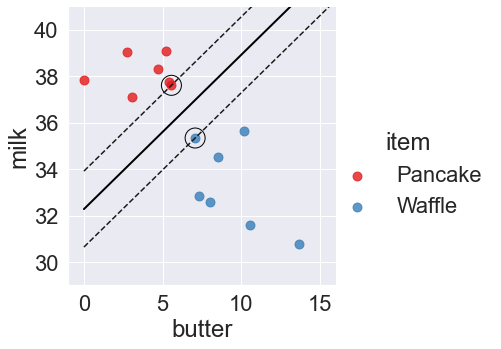

In [232]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
sv_1 = model.support_vectors_[0]
yy_down = m * xx + (sv_1[1] - m * sv_1[0])
sv_2 = model.support_vectors_[-1]
yy_up = m * xx + (sv_2[1] - m * sv_2[0])

# Look at the margins and support vectors
sns.lmplot(x='butter', y='milk', data=pancakes_waffles, hue='item', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 80})
plt.plot(xx, yy, linewidth=2, color='black');
plt.plot(xx, yy_down, 'k--');
plt.plot(xx, yy_up, 'k--');
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=400, facecolors='none',edgecolors='black');
plt.ylim((29,41));
plt.xlim((-1,16));

### Step 5.2: Quantify the results

In [233]:
# Compute the mean accuracy
print(model.score(X,y))

1.0


### Step 6: Predict a new case
[This recipe](https://www.food.com/recipe/basic-batter-waffles-110683) is 11.4% butter and 34.0% milk. Use the model we fit to determine whether this is a pancake or a waffle. 

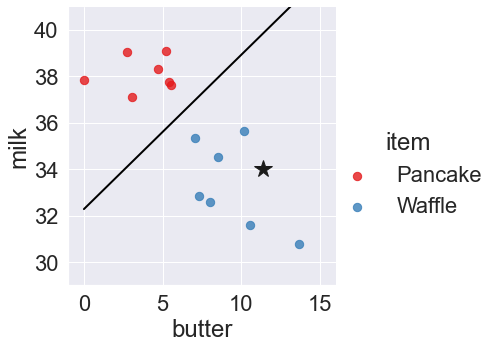

In [35]:
# Plot the point to visually see where the point lies
sns.lmplot(x='butter', y='milk', data=pancakes_waffles,hue='item', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');
plt.plot(11.4, 34.0, 'k*', markersize='18');
plt.ylim((29,41));
plt.xlim((-1,16));

In [237]:
# Predict if 11.4% butter, 34.0% milk
model.predict([[11.4,34.0]])

array([-1])

In [34]:
# Create a function to predict when a recipe is a pancake or a waffle
def pancake_or_waffle(butter, milk):
    if(model.predict([[butter, milk]]))==-1:
        print('This is a waffle recipe!')
    else:
        print('This is a pancake recipe!')

In [238]:
# Check the new point
pancake_or_waffle(11.4, 34.0)

This is a waffle recipe!


**Another example**: [This recipe](https://lilluna.com/easy-pancake-recipe/) is 5.5% butter and 37.3% milk. Use the model we fit to determine whether this is a pancake or a waffle.

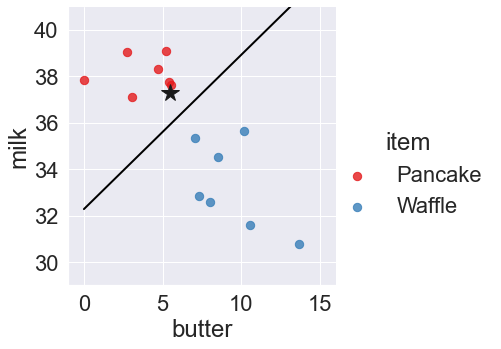

In [37]:
# Plot the point to visually see where the point lies
sns.lmplot(x='butter', y='milk', data=pancakes_waffles, hue='item', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');
plt.plot(5.5, 37.3, 'k*', markersize='18');
plt.ylim((29,41));
plt.xlim((-1,16));

In [38]:
# Predict if 5.5% butter, 37.3% milk
pancake_or_waffle(5.5, 37.3)

This is a pancake recipe!


# Hands-on exercise: C parameter

I gathered up a few more recipes and added them into a new expanded dataset.

In [39]:
# Read in the expanded pancake and waffle dataset
more_pancakes_waffles = pd.read_csv('https://raw.githubusercontent.com/bejajohn/pancake_waffle_svm/master/pancake_and_waffle_data_more.csv')
more_pancakes_waffles.head()

,item,flour,baking powder,sugar,salt,milk,butter,egg,vanilla
0,Pancake,45.133674,2.162809,1.853836,0.154486,37.611395,5.561522,7.522279,0.000000
1,Pancake,38.322979,1.574093,4.722272,0.393523,38.322979,4.722272,11.941881,0.000000
2,Pancake,43.163991,1.772935,5.395499,0.221617,37.768492,5.395499,5.395499,0.886468
3,Pancake,44.632464,0.916626,1.374937,0.114578,39.053406,2.749873,11.158116,0.000000
4,Pancake,41.706722,1.927258,3.910103,0.321210,39.101030,5.213471,7.820206,0.000000


**Step 1:** Plot this new data as we did with the original data. What do you notice about it? 

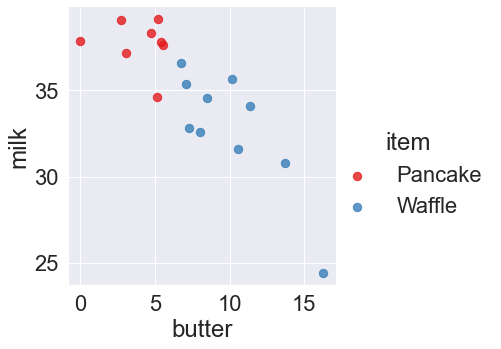

In [28]:
## Plot the data 

# Enter your code here
# Seaborn plot
sns.lmplot(x='butter',y='milk', data = more_pancakes_waffles, hue='item',
               palette='Set1',fit_reg=False,scatter_kws={"s":70});

**Step 2:** svm.SVC takes a couple of inputs. One of the parameters, C, is set to a default of 1. Try playing around with the C parameter. Visualze and quantify the results. What do you think this parameter does? (HINT: What if C=0.01? C = 10?)

In [104]:
## Fit the svm model

# Enter your code here
# Specify input and output for the model
X = more_pancakes_waffles[['butter','milk']].to_numpy()
y = np.where(more_pancakes_waffles['item']=='Waffle', -1, 1)

# Fit the SVM model
model = svm.SVC(kernel='linear',C=0.01)
model.fit(X, y)

SVC(C=0.01, kernel='linear')

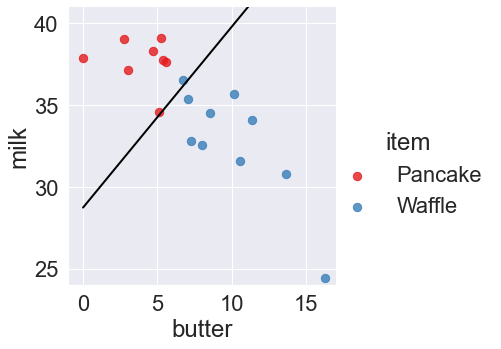

In [105]:
## Visualize the results 

# Enter your code here
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot(x='butter', y='milk', data=more_pancakes_waffles, hue='item', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');
plt.ylim((24,41));
plt.xlim((-1,17));

In [106]:
## Quantify the results

# Enter your code here
print(model.score(X,y))

0.9444444444444444


# Hands on exercise: higher dimensions

Let's say we wanted to use 3 ingredients as features in this analysis instead of two. What if we wanted to use all ingredients? Try redoing the analysis with more ingredients. 

How do your results turn out? 

In [107]:
## Fit the model

# Specify input and output for the model
X = more_pancakes_waffles[['butter','milk','flour']].to_numpy()
y = np.where(more_pancakes_waffles['item']=='Waffle', -1, 1)

# Fit the SVM model
model = svm.SVC(kernel = 'linear')
model.fit(X,y)
print(model.score(X,y))

1.0


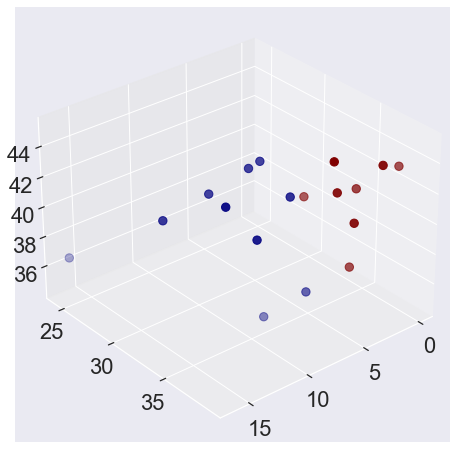

In [108]:
# Visualize the results
plt.figure(figsize = (10, 8))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(X[:,0],X[:,1],X[:,2],c=y,cmap="jet",s=70)
plot_axes.view_init(30, 50)
plt.show()

# Hands-on exercise: kernel trick and gamma parameter

In the previous exercises, we used a linear kernel. SVMs are actually very flexible classifiers that can cope with data even when they are not linearly separable. We will discuss the 'kernel trick' in the next class. In the meantime, try using the 'rbf' kernel and play around with the gamma parameter. What do you think this parameter does?

In [79]:
def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

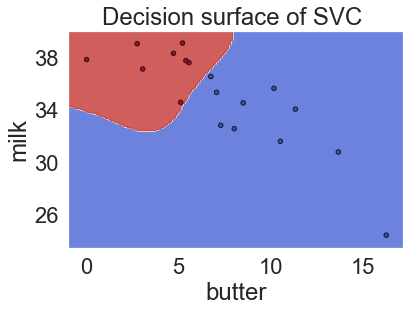

In [215]:
# Specify input and output for the model
X = more_pancakes_waffles[['butter','milk']].to_numpy()
y = np.where(more_pancakes_waffles['item']=='Waffle', -1, 1)

model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('milk')
ax.set_xlabel('butter')
ax.set_xticks((0,5,10,15))
ax.set_yticks((26,30,34,38))
ax.set_title(title)
plt.show()

# Hands-on exercise: Cross validation 

Perform cross validation to select reasonable choices for C and gamma.

In [211]:
# Get cross validation score on a single C, gamma combo
model = svm.SVC(kernel='rbf', C=0.5,gamma=0.01)
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(scores.mean())

[1.         0.75       1.         0.66666667 1.        ]
0.8833333333333332


In [207]:
# Get cross validation score on multiple C, gamma combos
C_vals = np.linspace(0.01,2,5)
gamma_vals = np.linspace(0.01,2,5)

all_mean_scores = np.zeros((len(C_vals),len(gamma_vals)))
for i in range(len(C_vals)):
    for j in range(len(gamma_vals)):
        model = svm.SVC(kernel='rbf', C=C_vals[i], gamma=gamma_vals[j])
        scores = cross_val_score(model, X, y, cv=5)
        all_mean_scores[i,j] = scores.mean()
print(all_mean_scores)

[[0.56666667 0.56666667 0.56666667 0.56666667 0.56666667]
 [0.88333333 0.76666667 0.61666667 0.61666667 0.56666667]
 [0.88333333 0.76666667 0.76666667 0.71666667 0.71666667]
 [0.88333333 0.86666667 0.76666667 0.76666667 0.71666667]
 [0.88333333 0.86666667 0.76666667 0.76666667 0.71666667]]


In [208]:
# Where is the accuracy the highest?
optimal_parameters = np.where(all_mean_scores == np.max(all_mean_scores))

In [209]:
# Results
print('The C parameter with the highest cross validation score is ',
      C_vals[optimal_parameters[0][0]])
print('The best gamma parameter with the highest cross validation score is ', 
      gamma_vals[optimal_parameters[1][0]])

The C parameter with the highest cross validation score is  0.5075
The best gamma parameter with the highest cross validation score is  0.01
